<a href="https://colab.research.google.com/github/123shwetarohokale/563-ShwetaR/blob/main/HW_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

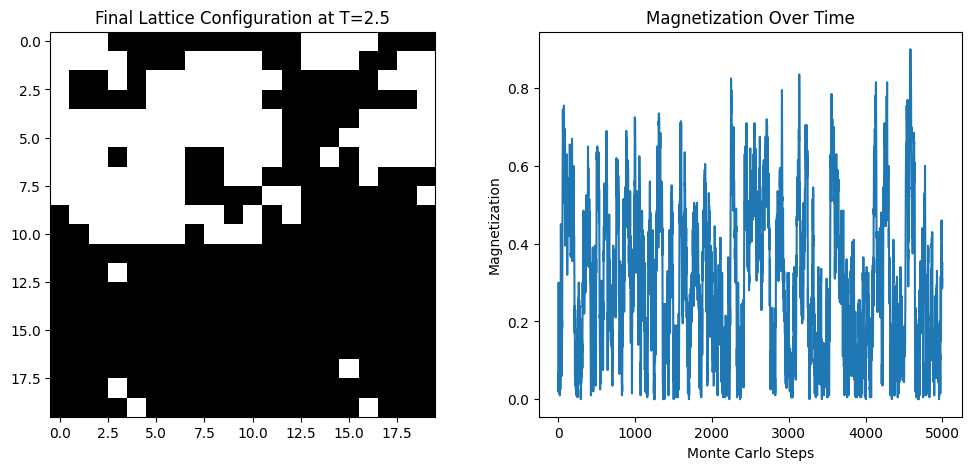

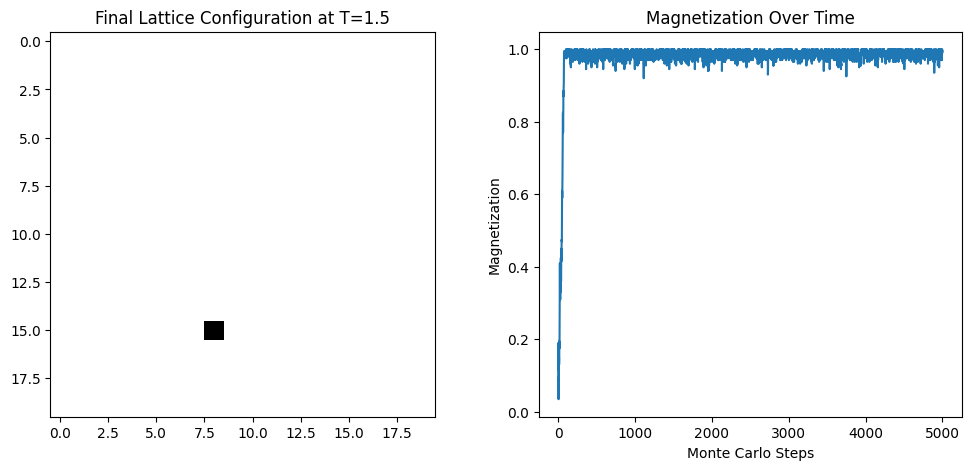

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# This simulation models the behavior of magnetic materials, such as iron.
# Initialize lattice with random spin configurations
size = 20

def initialize_lattice(size):
    return np.random.choice([-1, 1], size=(size, size))
def metropolis_step(lattice, beta):
    size = lattice.shape[0]
    for _ in range(size**2):
        i, j = np.random.randint(0, size, 2)
        delta_E = 2 * lattice[i, j] * (lattice[(i+1) % size, j] + lattice[i-1, j] +
            lattice[i, (j+1) % size] + lattice[i, j-1] )
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[i, j] *= -1

# Simulate the system using Monte Carlo method
steps = 5000
def simulate(size, temp, steps):
    beta = 1 / temp
    lattice = initialize_lattice(size)
    magnetization = []
    for _ in range(steps):
        metropolis_step(lattice, beta)
        magnetization.append(np.abs(np.sum(lattice)) / (size**2))
    return lattice, magnetization

def plot_results(lattice, magnetization, temp):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(lattice, cmap='gray')
    plt.title(f'Final Lattice Configuration at T={temp}')
    plt.subplot(1, 2, 2)
    plt.plot(magnetization)
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Magnetization')
    plt.title('Magnetization Over Time')
    plt.show()

temps = [2.5, 1.5]
for temp in temps:
    lattice, magnetization = simulate(size, temp, steps)
    plot_results(lattice, magnetization, temp)